<a href="https://colab.research.google.com/github/dhruv0rathore/GDP/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/housing.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:

median_bedrooms = df['total_bedrooms'].median()


df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<ipython-input-8-92b9f02091dc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


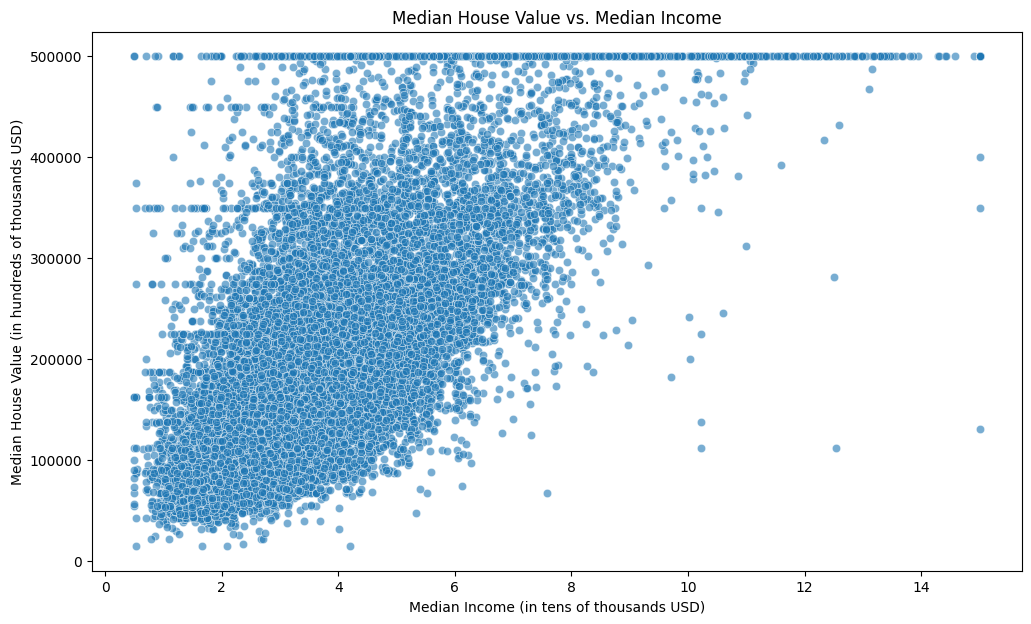

In [9]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.6)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income (in tens of thousands USD)')
plt.ylabel('Median House Value (in hundreds of thousands USD)')
plt.show()

In [10]:
capped_value = 500001.000000
num_capped_rows = df[df['median_house_value'] >= capped_value].shape[0]

print(f"Number of rows with capped median_house_value: {num_capped_rows}")
print(f"Percentage of rows with capped median_house_value: {(num_capped_rows / len(df)) * 100:.2f}%")

Number of rows with capped median_house_value: 965
Percentage of rows with capped median_house_value: 4.68%


In [11]:
print("Unique categories in 'ocean_proximity':")
print(df['ocean_proximity'].unique())

print("\nValue counts for 'ocean_proximity':")
print(df['ocean_proximity'].value_counts())

Unique categories in 'ocean_proximity':
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

Value counts for 'ocean_proximity':
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


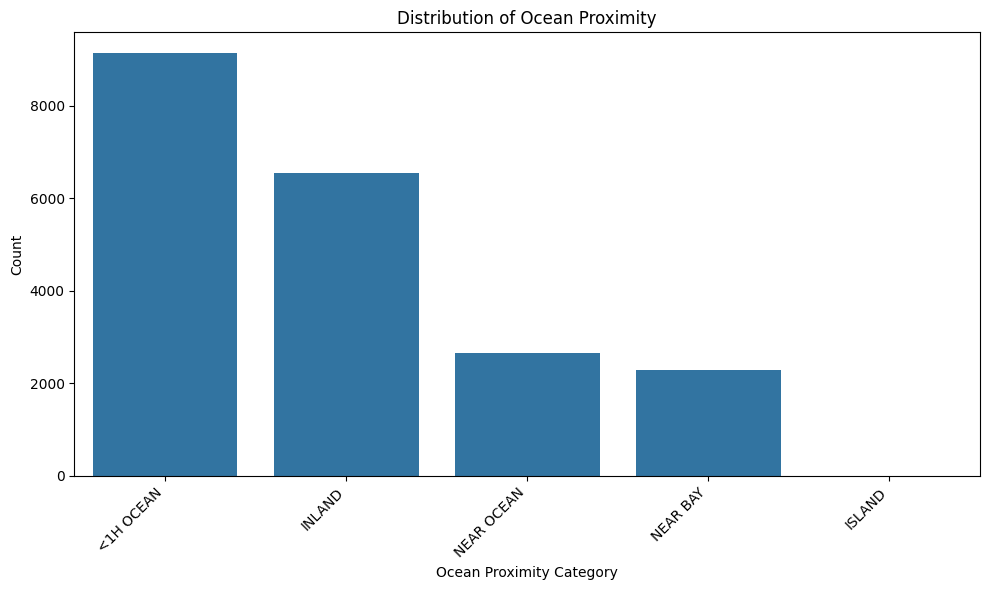

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ocean_proximity', order=df['ocean_proximity'].value_counts().index)
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

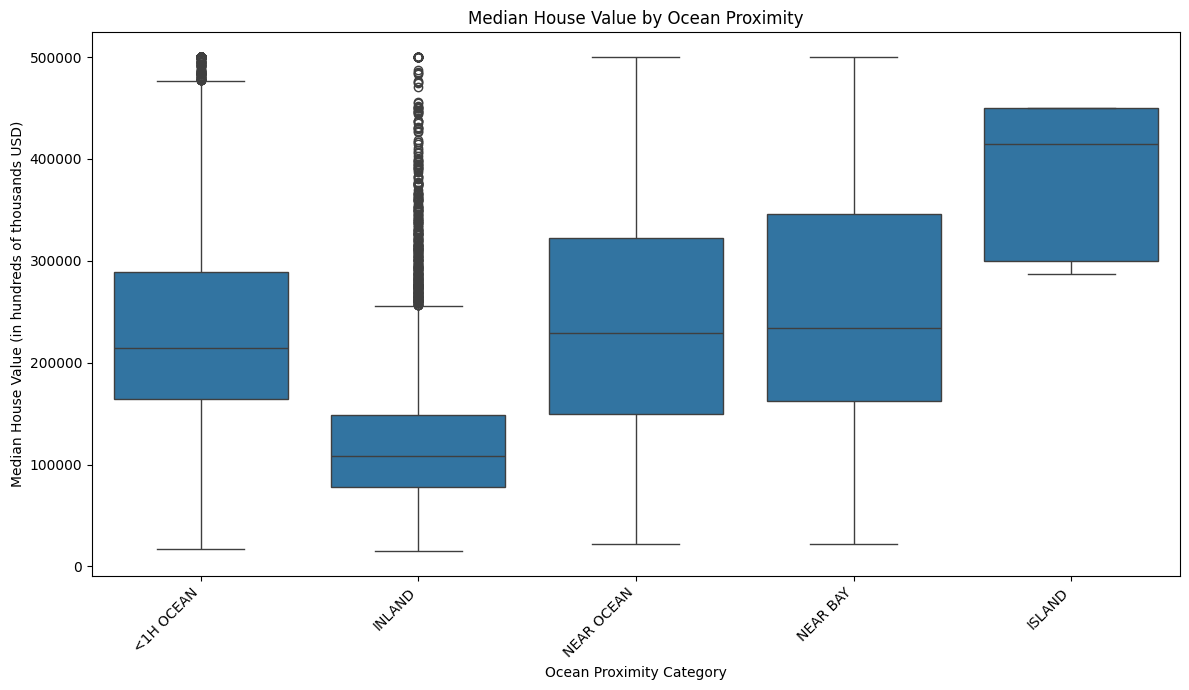

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', order=df['ocean_proximity'].value_counts().index)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity Category')
plt.ylabel('Median House Value (in hundreds of thousands USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlation Matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -

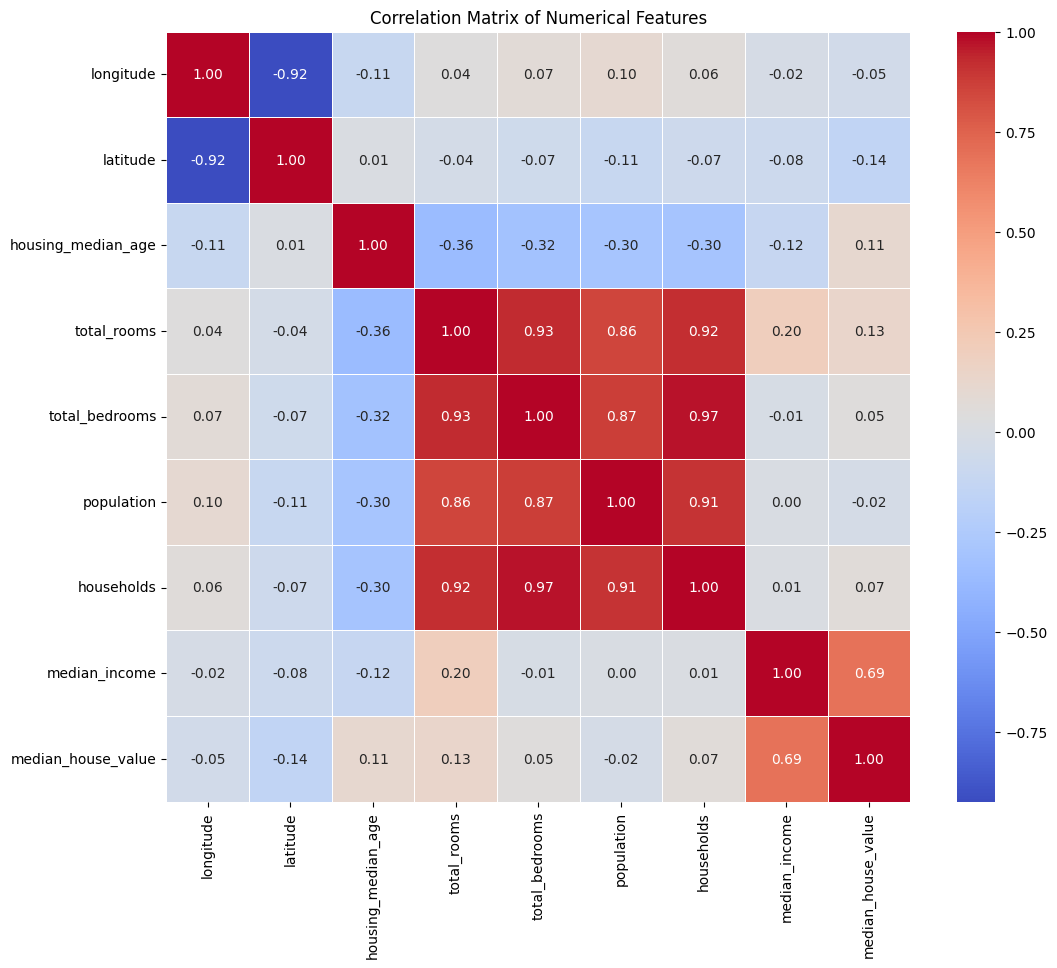

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix with a heatmap (more impactful!)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [2]:
# Create 'rooms_per_household'
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create 'bedrooms_per_room'
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Create 'population_per_household'
df['population_per_household'] = df['population'] / df['households']

# Display the first few rows with the new features to confirm
print(df[['total_rooms', 'households', 'population', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())

   total_rooms  households  population  rooms_per_household  \
0        880.0       126.0       322.0             6.984127   
1       7099.0      1138.0      2401.0             6.238137   
2       1467.0       177.0       496.0             8.288136   
3       1274.0       219.0       558.0             5.817352   
4       1627.0       259.0       565.0             6.281853   

   bedrooms_per_room  population_per_household  
0           0.146591                  2.555556  
1           0.155797                  2.109842  
2           0.129516                  2.802260  
3           0.184458                  2.547945  
4           0.172096                  2.181467  


Correlation Matrix with New Features:
                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924664           -0.108197   
latitude                  -0.924664  1.000000            0.011173   
housing_median_age        -0.108197  0.011173            1.000000   
total_rooms                0.044568 -0.036100           -0.361262   
total_bedrooms             0.069608 -0.066983           -0.320451   
population                 0.099773 -0.108785           -0.296244   
households                 0.055310 -0.071035           -0.302916   
median_income             -0.015176 -0.079809           -0.119034   
median_house_value        -0.045967 -0.144160            0.105623   
rooms_per_household       -0.027540  0.106389           -0.153277   
bedrooms_per_room          0.092657 -0.113815            0.136089   
population_per_household   0.002476  0.002366            0.013191   

                          total_rooms  total_bedrooms  populatio

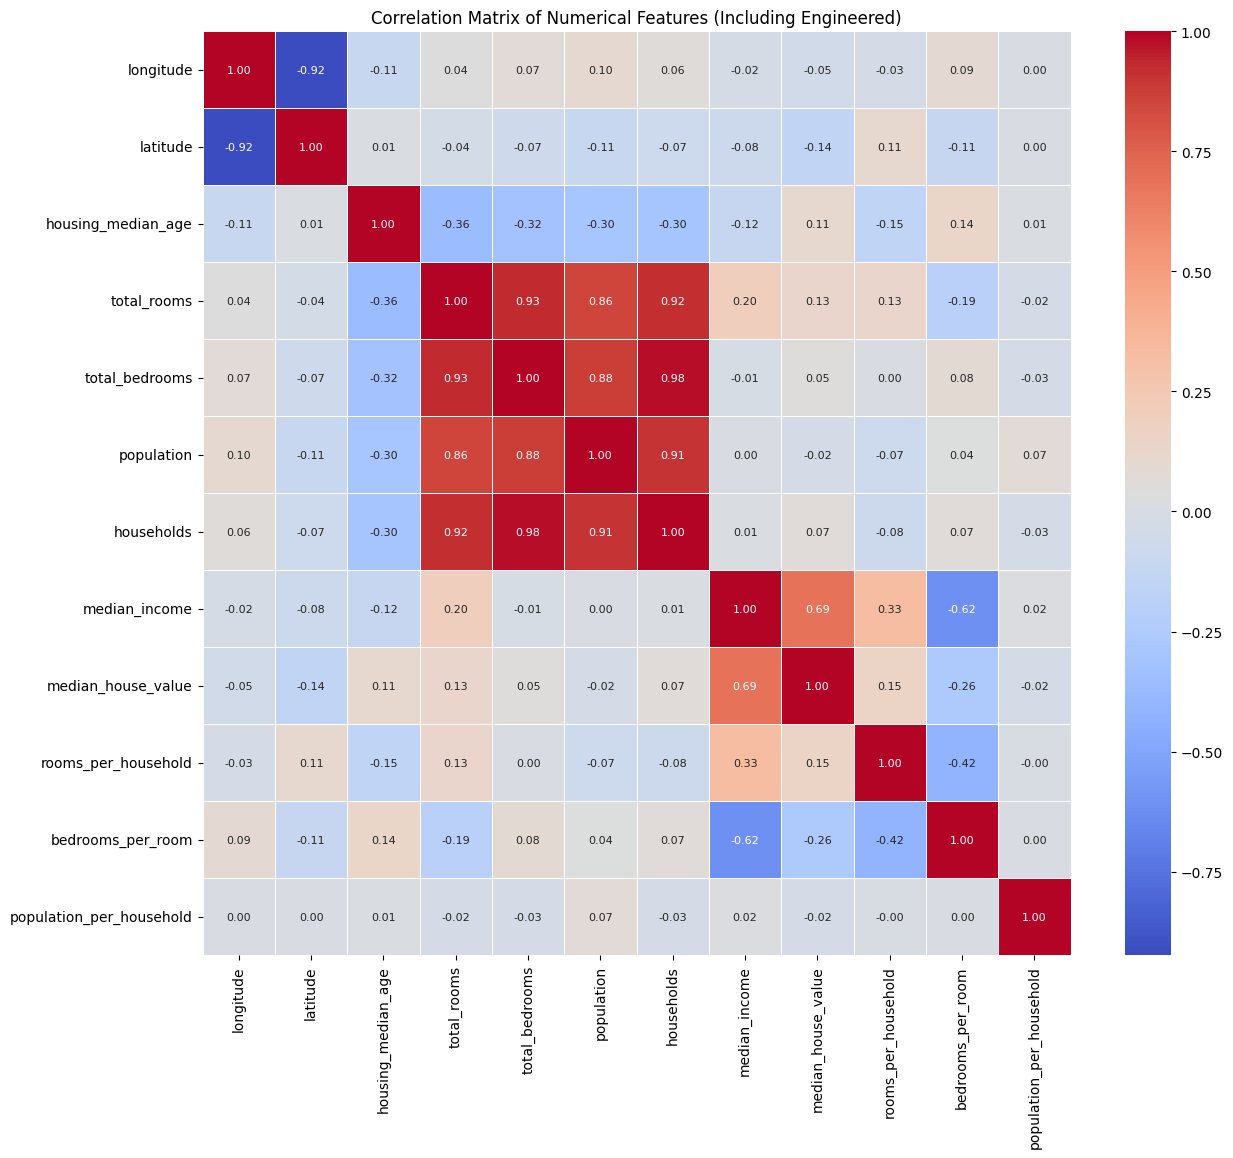

In [3]:
# Calculate the correlation matrix with the new features
correlation_matrix_new = df.corr(numeric_only=True)

# Display the correlation matrix (optional, but good to see the numbers)
print("Correlation Matrix with New Features:")
print(correlation_matrix_new)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(14, 12)) # Make it a bit larger to accommodate more features
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8}) # Adjust font size if needed
plt.title('Correlation Matrix of Numerical Features (Including Engineered)')
plt.show()


- The most influential factors for median_house_value got to be the median_income and obviously so, the richer the person the more are they expected to invest on a bigger house
- Well for the starters, there were a lot of rows that had missing values for the column total_bedrooms so we identified missing values in total_bedrooms and imputed them with the column's median to preserve data integrity.
One other thing was that, using the scatter plot we found that the median_house_values were capped at 500,001 dollars.
- We had to engineer some newer columns because the older columns just werent giving us enough good relations, with the help of the newer features we saw that there was big strong negative correlation between median_income and bedrooms_per_room meaning that as the median income increased lesser got the bedrooms in the house, meaning they were used somewhere else other than sleeping and having beds in them.
The other less impactful observation was that of the median_income positively relating with the rooms_per_household
- The most surprising relation got to be that of the bedrooms_per_rooms and median_income
-Analysis of ocean_proximity revealed distinct categories with varying distributions, notably that ISLAND properties command significantly higher median house values, while INLAND properties are generally the least expensive. <1H OCEAN and INLAND represent the majority of the dataset's observations.